<a href="https://colab.research.google.com/github/AndresPautrat/DataMining/blob/main/Keras1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link: https://colab.research.google.com/drive/1S70Fg-1XKtRMKxQGUnSLdXFXniLpylRL?usp=sharing 

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Dropout,Conv2D,MaxPooling2D
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
!git clone https://github.com/zalandoresearch/fashion-mnist.git

Cloning into 'fashion-mnist'...
remote: Enumerating objects: 692, done.
remote: Total 692 (delta 0), reused 0 (delta 0), pack-reused 692
Receiving objects: 100% (692/692), 105.21 MiB | 42.89 MiB/s, done.
Resolving deltas: 100% (399/399), done.


In [ ]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [ ]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 784) (60000,) (10000, 784) (10000,)


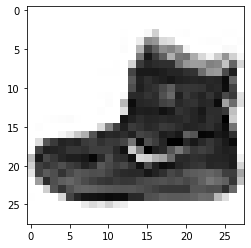

In [ ]:
plt.imshow(np.reshape(X_train[0], (28,28)), cmap='Greys')

In [ ]:
X_train, y_train = load_mnist('fashion-mnist/data/fashion', kind='train')
X_test, y_test = load_mnist('fashion-mnist/data/fashion', kind='t10k')

In [ ]:
#Excercise 1
#Here a Flatten layer is used to convert the image in 2 dimensions to a hi dimension and then the dense layers are used to
#with 8 and 5 neurons to try that these 2 are in charge of the prediction.

#I use the relu activation function because it is simple, it behaves well with images and it is linear
#Finally, a softmax activation is used because it works well on the last layer and works well with images.
model = Sequential([Flatten(),
                    Dense(8,activation='relu'),
                    Dense(5, activation='softmax')])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
hist = model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 8.5558 - accuracy: 0.1001
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 6.4621 - accuracy: 0.0992
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 6.4615 - accuracy: 0.1001
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 6.4615 - accuracy: 0.1009
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 6.4615 - accuracy: 0.1009
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 6.4615 - accuracy: 0.0991
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 6.4615 - accuracy: 0.0996
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 6.4615 - accuracy: 0.0990
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 6.4615 - accuracy: 0.0997
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 6.461

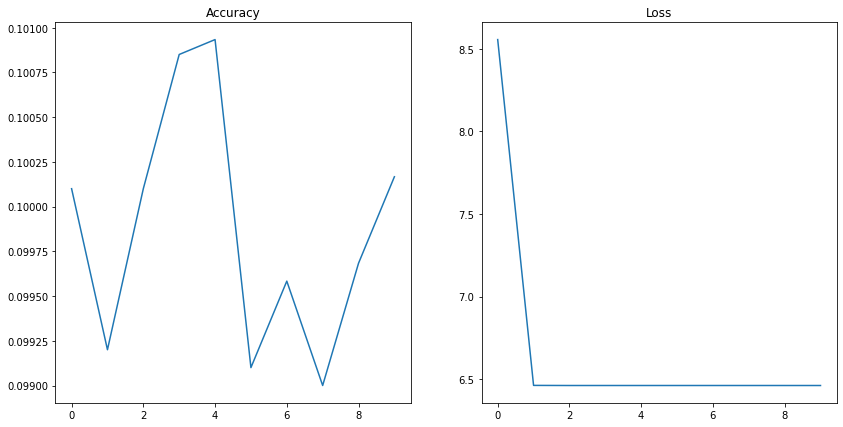

In [ ]:
plt.figure(figsize=[14, 7])
ax = plt.subplot(1, 2, 1)
plt.plot(hist.history['accuracy'])
plt.title('Accuracy')
ax = plt.subplot(1, 2, 2)
plt.plot(hist.history['loss'])
plt.title('Loss')
plt.show()
#The precision is irregular at all times, it would be necessary to rethink the layers, activation functions and neurons used
#The loss decreases at the beginning but then it remains, which is wrong

In [ ]:
#Excercise 2
#Here a Flatten layer is used to convert the image in 2 dimensions to a hi dimension and then the dense layers are used to
#with 18 and 128 neurons to try that these 2 are in charge of the prediction.

#Then a dropout layer is used to try to avoid a dependency on a single neuron

#Finally, a softmax activation is used because it works well on the last layer and works well with images.
model2 = Sequential([Flatten(),
                    Dense(18,activation='relu'),
                    Dense(128, activation='relu'),
                    Dropout(0.2),
                    Dense(3, activation='softmax')])
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
hist2 = model2.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 3.7492 - accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 3.5248 - accuracy: 0.1008
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 3.5246 - accuracy: 0.0999
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 3.5246 - accuracy: 0.1008
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 3.5246 - accuracy: 0.1002
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 3.5246 - accuracy: 0.0992
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 3.5246 - accuracy: 0.0995
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 3.5246 - accuracy: 0.0980
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 3.5246 - accuracy: 0.1003
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 3.524

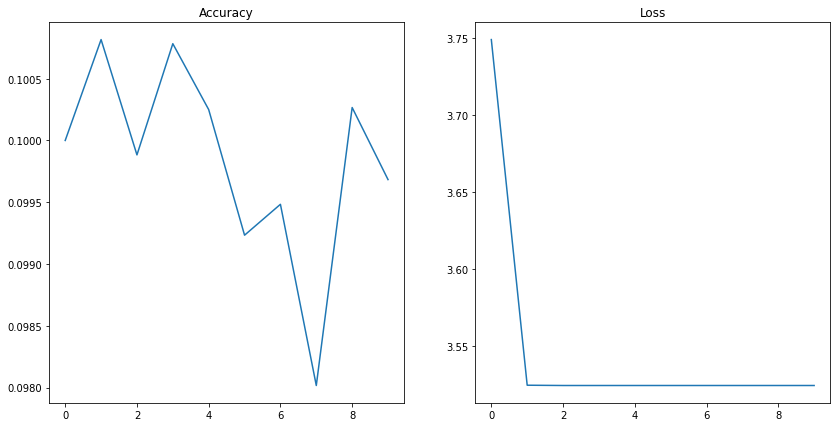

In [ ]:
plt.figure(figsize=[14, 7])
ax = plt.subplot(1, 2, 1)
plt.plot(hist2.history['accuracy'])
plt.title('Accuracy')
ax = plt.subplot(1, 2, 2)
plt.plot(hist2.history['loss'])
plt.title('Loss')
plt.show()
#The precision is irregular at all times, it would be necessary to rethink the layers, activation functions and neurons used
#The loss decreases at the beginning but then it remains, which is wrong

In [ ]:
#Pregunta 3
#Convolutional layer is used to make good use of its operation with images
#Here a Flatten layer is used to convert the image in 2 dimensions to a hi dimension
#Then dense layers are used with relu activation since they are simple, it works well with images

#Finally, a softmax activation is used because it works well on the last layer and works well with images.
model3 = Sequential([Conv2D(28, kernel_size=(3, 3), input_shape=(28, 28, 1)),
                    Flatten(),
                    Dense(18,activation='relu'),
                    Dense(12, activation='relu'),
                    Dense(10, activation='relu'),
                    Dense(3, activation='softmax')])
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
X_train3 = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test3 = X_test.reshape(X_test.shape[0], 28, 28, 1)
print(X_train2.shape, X_test2.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [ ]:
hist3 = model3.fit(X_train3, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 30s 16ms/step - loss: 3.8018 - accuracy: 0.1006
Epoch 2/10
1875/1875 [==============================] - 27s 15ms/step - loss: 3.5246 - accuracy: 0.0997
Epoch 3/10
1875/1875 [==============================] - 26s 14ms/step - loss: 3.5246 - accuracy: 0.0993
Epoch 4/10
1875/1875 [==============================] - 26s 14ms/step - loss: 3.5246 - accuracy: 0.1001
Epoch 5/10
1875/1875 [==============================] - 26s 14ms/step - loss: 3.5246 - accuracy: 0.1001
Epoch 6/10
1875/1875 [==============================] - 27s 14ms/step - loss: 3.5246 - accuracy: 0.0984
Epoch 7/10
1875/1875 [==============================] - 27s 14ms/step - loss: 3.5246 - accuracy: 0.1007
Epoch 8/10
1875/1875 [==============================] - 27s 14ms/step - loss: 3.5246 - accuracy: 0.1010
Epoch 9/10
1875/1875 [==============================] - 27s 14ms/step - loss: 3.5246 - accuracy: 0.1010
Epoch 10/10
1875/1875 [==============================] - 27s 14m

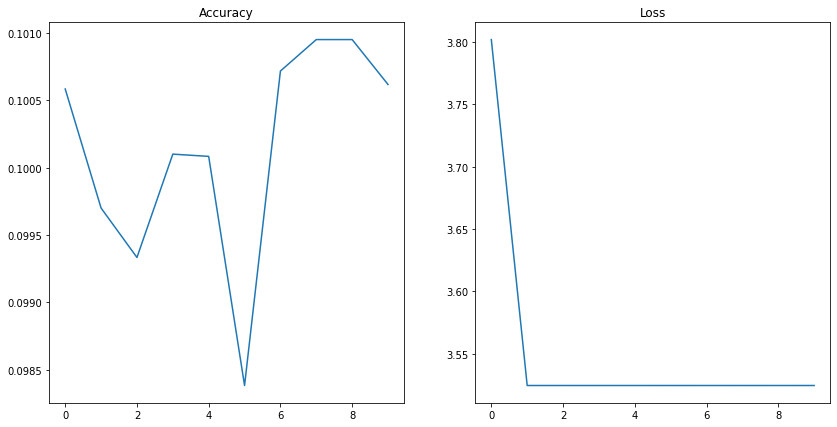

In [ ]:
plt.figure(figsize=[14, 7])
ax = plt.subplot(1, 2, 1)
plt.plot(hist3.history['accuracy'])
plt.title('Accuracy')
ax = plt.subplot(1, 2, 2)
plt.plot(hist3.history['loss'])
plt.title('Loss')
plt.show()
#The precision is irregular at all times, it would be necessary to rethink the layers, activation functions and neurons used
#The loss decreases at the beginning but then it remains, which is wrong

In [ ]:
#Pregunta 4
#Convolutional layer is used to make good use of its operation with images, i use 28 and 10 neuros because its quicker to compile
#Here a Flatten layer is used to convert the image in 2 dimensions to a hi dimension
#Then dense layers are used with relu activation since they are simple, it works well with images

#Finally, a softmax activation is used because it works well on the last layer and works well with images.
model4 = Sequential([Conv2D(28, kernel_size=(3, 3), input_shape=(28, 28, 1)),
                     Conv2D(10, kernel_size=(3, 3), input_shape=(28, 28, 1)),
                    MaxPooling2D(pool_size=(2, 2)),
                    Flatten(),
                    Dense(10, activation='relu'),
                    Dropout(0.2),
                    Dense(15, activation='softmax')])
model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#The loss decreases at the beginning but then it remains, which is wrong

In [ ]:
hist4 = model4.fit(X_train3, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 73s 39ms/step - loss: 12.0706 - accuracy: 0.0984
Epoch 2/10
1875/1875 [==============================] - 73s 39ms/step - loss: 11.9447 - accuracy: 0.0994
Epoch 3/10
1875/1875 [==============================] - 75s 40ms/step - loss: 11.9447 - accuracy: 0.1012
Epoch 4/10
1875/1875 [==============================] - 75s 40ms/step - loss: 11.9447 - accuracy: 0.0939
Epoch 5/10
1875/1875 [==============================] - 74s 40ms/step - loss: 11.9447 - accuracy: 0.0804
Epoch 6/10
1875/1875 [==============================] - 74s 39ms/step - loss: 11.9447 - accuracy: 0.0708
Epoch 7/10
1875/1875 [==============================] - 74s 39ms/step - loss: 11.9447 - accuracy: 0.0540
Epoch 8/10
1875/1875 [==============================] - 74s 40ms/step - loss: 11.9448 - accuracy: 0.0635
Epoch 9/10
1875/1875 [==============================] - 74s 39ms/step - loss: 11.9448 - accuracy: 0.0623
Epoch 10/10
1875/1875 [==============================] 

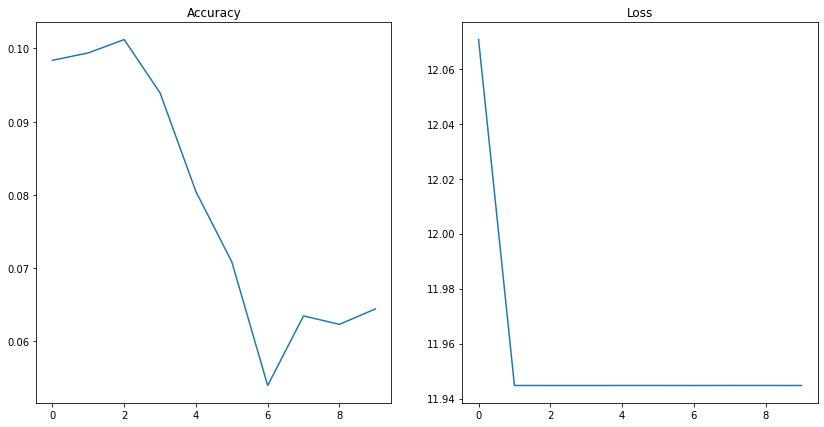

In [ ]:
plt.figure(figsize=[14, 7])
ax = plt.subplot(1, 2, 1)
plt.plot(hist4.history['accuracy'])
plt.title('Accuracy')
ax = plt.subplot(1, 2, 2)
plt.plot(hist4.history['loss'])
plt.title('Loss')
plt.show()
#Precision decreases almost in all epochs, so the result is bad
#The loss decreases at the beginning but then it remains, which is wrong

In [ ]:
print("model \t\t\t|\t\t\t loss \t\t\t|\t\t\t accuracy")
print("Modelo 1","\t\t|\t\t",hist.history['loss'][-1],"\t\t|\t\t",hist.history['accuracy'][-1])
print("Modelo 2","\t\t|\t\t",hist2.history['loss'][-1],"\t\t|\t\t",hist2.history['accuracy'][-1])
print("Modelo 3","\t\t|\t\t",hist3.history['loss'][-1],"\t\t|\t\t",hist3.history['accuracy'][-1])
print("Modelo 4","\t\t|\t\t",hist4.history['loss'][-1],"\t\t|\t\t",hist4.history['accuracy'][-1])

model 			|			 loss 			|			 accuracy
Modelo 1 		|		 6.461464881896973 		|		 0.10016666352748871
Modelo 2 		|		 3.5246260166168213 		|		 0.09968333691358566
Modelo 3 		|		 3.524623155593872 		|		 0.10061666369438171
Modelo 4 		|		 11.944741249084473 		|		 0.06441666930913925
